In [1]:
import numpy as np
import pandas as pd
from coinmetrics.api_client import CoinMetricsClient
import requests
from datetime import datetime

client = CoinMetricsClient() # initialize coinmetrics API client

In [2]:
# get list of assets from coingecko api

parameters= {'vs_currency':'USD'}
res = requests.get('https://api.coingecko.com/api/v3/coins/markets', params=parameters).json()

# convert to dataframe and take list of assets
df = pd.DataFrame(res)
assets = list(df.symbol)

# remove assets that coinmetrics does not have data from 
# and stablecoins (useless for correlation analysis)
unwanted_assets = ['xrd','xcn','steth','usdc','ust','busd','frax', 'osmo', 'gmt', 'usdt', 'ape', 'usdp',
             'one', 'mim', 'hbtc', 'renbtc', 'dfi','cusdc','ceth', 'cdai', 'bluna', 'bit', 'wbtc', 'usdn', 'miota']
asset_list = [a for a in assets if a not in unwanted_assets]

In [3]:
# get historical data for prices of assets
prices = client.get_asset_metrics(assets=asset_list, 
                                  metrics=['ReferenceRate'], start_time='2020-12-01', frequency='1d')

In [4]:
## data cleaning

# convert to dataframe
prices_df = pd.DataFrame(prices).pivot(index='time', columns='asset', values='ReferenceRate')

prices_df.index = pd.to_datetime(prices_df.index) 
prices_df = prices_df.dropna(axis='columns')

prices_df = prices_df.astype(float)

In [5]:
prices_df.head(10)

asset,aave,ada,algo,ar,atom,avax,axs,bat,bch,bnb,...,tusd,uni,vet,waves,xlm,xmr,xrp,xtz,zec,zil
time,,,,,,,,,,,,,,,,,,,,,
2020-12-01 00:00:00+00:00,76.649734,0.171951,0.329239,2.363927,5.569639,3.717023,0.454493,0.243732,318.118601,31.422979,...,0.999458,3.776651,0.015968,7.083968,0.202571,130.002083,0.667397,2.487084,79.256503,0.029353
2020-12-02 00:00:00+00:00,74.801817,0.155858,0.309567,2.188019,5.274696,3.577539,0.411350,0.235692,287.706629,30.130931,...,1.000516,3.558437,0.014763,6.825375,0.184309,125.997524,0.612945,2.329672,75.254779,0.028125
2020-12-03 00:00:00+00:00,86.999061,0.158876,0.341245,2.243091,5.529482,3.779460,0.498843,0.242652,294.414805,30.347756,...,1.000682,4.006508,0.016615,7.115409,0.185732,128.099376,0.631992,2.399785,76.679612,0.031493
2020-12-04 00:00:00+00:00,91.344085,0.164382,0.341497,2.257932,5.512993,3.814993,0.512241,0.243224,292.208063,30.667995,...,1.000756,3.889442,0.017418,7.400363,0.184641,132.977422,0.631054,2.409438,75.782472,0.033666
2020-12-05 00:00:00+00:00,81.740729,0.149387,0.328055,2.102203,5.076850,3.555171,0.433201,0.230111,281.556369,29.167784,...,1.000604,3.535837,0.015799,7.291999,0.163216,127.241016,0.557855,2.271722,69.521756,0.029700
2020-12-06 00:00:00+00:00,91.377516,0.159152,0.343184,2.324770,5.242897,3.626282,0.475080,0.235214,286.035529,29.634125,...,0.999964,3.674491,0.017435,8.160299,0.170897,133.074433,0.581770,2.318847,71.601832,0.033868
2020-12-07 00:00:00+00:00,88.173911,0.159078,0.336426,2.258822,5.217418,3.603064,0.479852,0.237319,286.559703,29.486098,...,0.999904,3.639528,0.017193,8.442907,0.175655,134.235297,0.620996,2.321293,74.422637,0.035447
2020-12-08 00:00:00+00:00,90.974787,0.154163,0.330944,2.232109,5.098411,3.386403,0.564616,0.235905,284.252604,29.346139,...,0.999528,3.758119,0.018072,8.984441,0.168254,139.010986,0.608369,2.271126,75.027345,0.035630
2020-12-09 00:00:00+00:00,80.241804,0.140703,0.299878,2.063077,4.731862,3.142093,0.568201,0.220299,267.011064,27.640194,...,1.000110,3.314691,0.016367,7.803223,0.152538,135.630607,0.559538,2.151925,69.553966,0.031319


In [6]:
# return mean of all correlations in dataframe to one asset over a time period

def correlation_mean(df, coin, w):
    
    returns = np.log(df/df.shift(1))
    returns.dropna(inplace=True)
    
    rolling_corr = returns[coin].rolling(window=w).corr(returns) # rolling mean of correlation
    rolling_corr = rolling_corr.drop(columns=[coin])

    fisher_rolling = rolling_corr.apply(np.arctanh) # fisher transform of correlations 
    mean = fisher_rolling.mean(axis=1).apply(np.tanh) # compute correlation mean and compute inverse fisher transform
    mean.fillna(0)
    
    return mean

In [7]:
corr_means = {} # dictionary of correlation means
ws = [7, 10, 14, 21, 28] # time periods in days

for w in ws:
    corr_means[w] = correlation_mean(prices_df, 'btc', w)

In [10]:
danger = {}

for k, v in corr_means.items():
    danger[k] = list(v[v < 0.48].index)

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
def set_plt_defaults():
    plt.rcParams['figure.figsize'] = (16,10) # default figure size
    
    # position of chart in figure
    plt.rcParams['figure.subplot.left'] = 0.1
    plt.rcParams['figure.subplot.top'] = 0.92
    plt.rcParams['figure.subplot.right'] = 0.9
    
    # outputs
    fig_out = plt.figure()
    ax_out = plt.subplot2grid((1,1),(0,0))
    
    # no tick dashes at the left-boundary of the grid
    ax_out.yaxis.set_ticks_position('none')
    
    # gridline style
    plt.grid(color=[0.25]*3, 
             linestyle='-', 
             linewidth=0.75, 
             alpha=0.25, 
             zorder=0
            )
    
    # only plot horizontal gridlines
    ax_out.xaxis.grid()
    
    # plot x-axis zero line
    ax_out.axhline(linewidth=1, color='black')
    
    plt.box(False)
    
    return fig_out, ax_out;

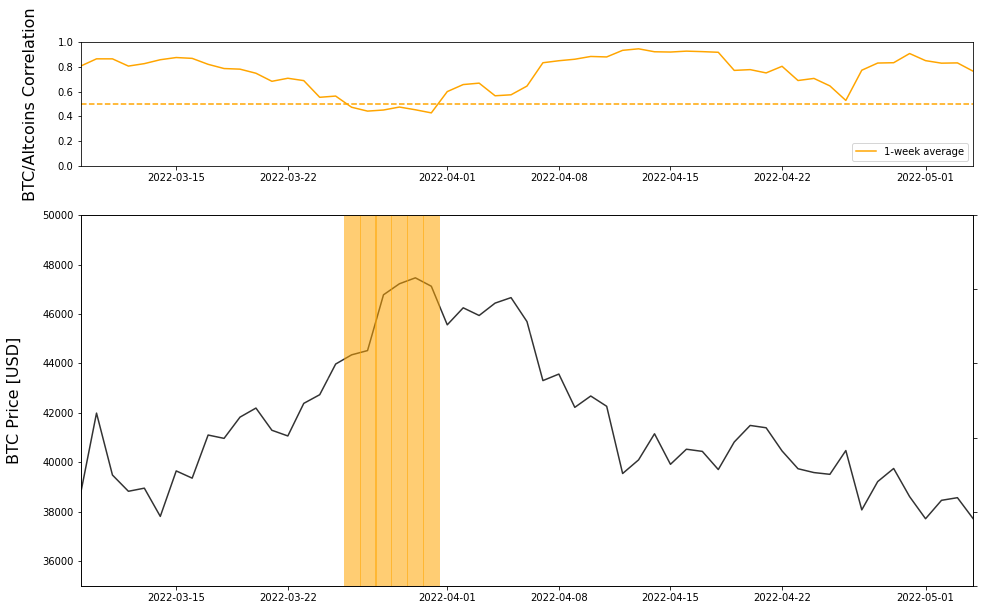

In [13]:
plt.rcParams['figure.figsize'] = (16,10) # default figure size

f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]})

a0.plot(corr_means[7].index, 
        corr_means[7].values, 
        color='orange', 
        alpha=1, label='1-week average')
a0.set_ylim([0, 1])
a0.set_xlim([corr_means[7].index[-57], corr_means[7].index[-1]])
a0.set_ylabel('BTC/Altcoins Correlation', fontsize=16, labelpad=20)
a0.axhline(y=0.5, color='orange', linestyle='dashed')
a0.legend(loc='lower right')

a1.plot(prices_df.index, 
        prices_df['btc'], 
        color='k', 
        alpha=0.8)

a1.set_xlim([prices_df.index[-57], prices_df.index[-1]])

a1.set_ylabel('BTC Price [USD]', fontsize=16, labelpad=20)

# create copy of x-axis so we can plot another data segment
a3 = a1.twinx()
a3.plot(corr_means[7].index, 
        corr_means[7].values, 
        color='white', 
        alpha=0.1)
a3.set_ylim([0, 1])
a3.set_yticklabels([])
a3.vlines(danger[7], 0, 1, color='orange', alpha=0.55, linewidth=17)


a1.set_ylim([35000, 50000])
plt.savefig('corr_danger_small.png')

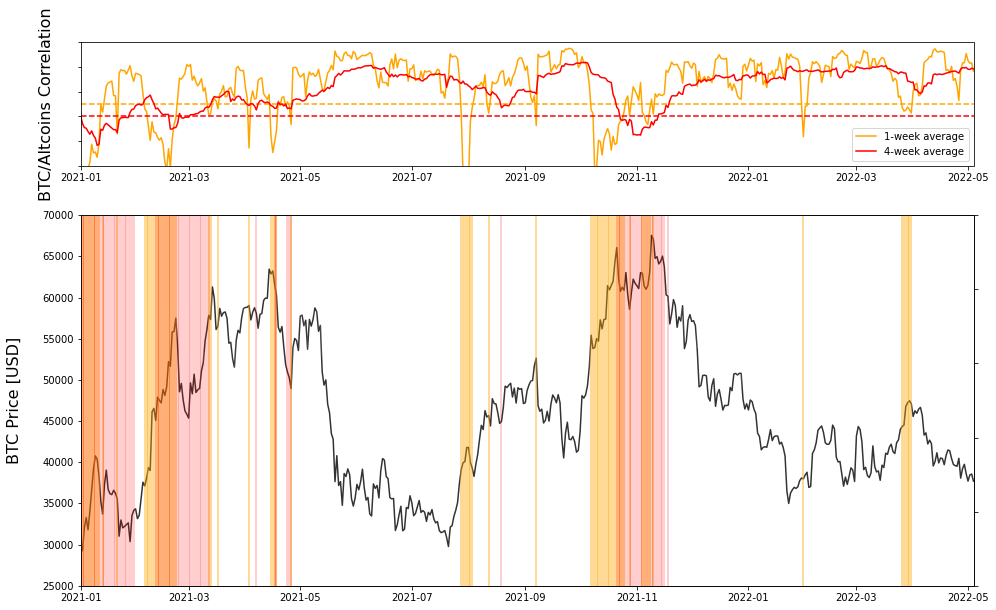

In [14]:
f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]})

a0.plot(corr_means[7].index, 
        corr_means[7].values, 
        color='orange', 
        alpha=1, label='1-week average')
a0.set_ylim([0, 1])
a0.set_xlim([corr_means[7].index[30], corr_means[7].index[-1]])
a0.set_ylabel('BTC/Altcoins Correlation', fontsize=16, labelpad=20)
a0.axhline(y=0.5, color='orange', linestyle='dashed')

a0.plot(corr_means[28].index, 
        corr_means[28].values, 
        color='r', 
        alpha=1, label='4-week average')
a0.set_ylim([0, 1])
a0.set_yticklabels([])
a0.axhline(y=0.4, color='red', linestyle='dashed')
a0.legend()

a1.plot(prices_df.index, 
        prices_df['btc'], 
        color='k', 
        alpha=0.8)

a1.set_xlim([prices_df.index[31], prices_df.index[-1]])

a1.set_ylabel('BTC Price [USD]', fontsize=16, labelpad=20)

# create copy of x-axis so we can plot another data segment
a3 = a1.twinx()
a3.plot(corr_means[7].index, 
        corr_means[7].values, 
        color='white', 
        alpha=0.1)
a3.set_ylim([0, 1])
a3.set_yticklabels([])
a3.vlines(danger[7], 0, 1, color='orange', alpha=0.55)
a3.vlines(danger[28], 0, 1, color='red', alpha=0.25)


a1.set_ylim([25000, 70000])
plt.savefig('corr_danger_good.png')